In [56]:
import numpy as np
import pandas as pd

In [57]:
data = pd.read_csv('churn_analysis.csv')

In [58]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [59]:
data.shape

(3333, 23)

# 1
В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:
- state — штат США
- account_length — длительность использования аккаунта
- area_code — деление пользователей на псевдорегионы, использующееся в телекоме
- intl_plan — подключена ли у пользователя услуга международного общения
- vmail_plan — подключена ли у пользователя услуга голосовых сообщений
- vmail_message — количество голосых сообщений, который пользователь отправил / принял
- day_calls — сколько пользователь совершил дневных звонков
- day_mins — сколько пользователь проговорил минут в течение дня
- day_charge — сколько пользователь заплатил за свою дневную активность
- eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
- night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
- intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
- custserv_calls — сколько раз пользователь позвонил в службу поддержки
- treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
- mes_estim — оценка интенсивности пользования интернет мессенджерами
- churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

In [60]:
from scipy.stats import chi2_contingency

In [61]:
pt = data.loc[data.treatment == 1, :].pivot_table(index="state", 
     values="area_code", columns="churn", aggfunc = len, fill_value=0)

In [62]:
from itertools import combinations

In [63]:
p_values_1 = []
for state1, state2 in combinations(set(data.state.values), 2):
    subtable = pt.loc[[state1, state2], :]
    p_values_1.append(chi2_contingency(subtable, correction=False)[1])

In [64]:
sum([x < 0.05 for x in p_values_1])

34

In [65]:
p_values_2 = []
for state1, state2 in combinations(set(data.state.values), 2):
    subtable = pt.loc[[state1, state2], :]
    p_values_2.append(chi2_contingency(subtable, correction=True)[1])

In [66]:
sum([x < 0.05 for x in p_values_2])

0

In [69]:
from scipy.stats import fisher_exact

In [70]:
p_values_3 = []
for state1, state2 in combinations(set(data.state.values), 2):
    subtable = pt.loc[[state1, state2], :]
    p_values_3.append(fisher_exact(subtable)[1])

In [71]:
sum([x < 0.05 for x in p_values_3])

10

In [72]:
from scipy.stats import pearsonr

In [73]:
pearsonr(data['day_calls'], data['mes_estim'])

(-0.051794350587572625, 0.0027798836869756707)

In [74]:
from scipy.stats import spearmanr

In [75]:
spearmanr(data['day_calls'], data['mes_estim'])

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [76]:
from scipy.stats import probplot
import pylab 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165])),
 (20.063266290158989, 100.43564356435644, 0.9989016969302863))

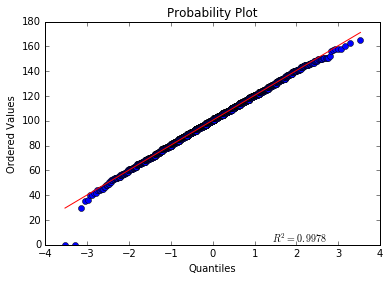

In [77]:
probplot(data['day_calls'], dist="norm", plot=pylab)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([ 0.05,  0.05,  0.05, ...,  0.89,  0.91,  0.96])),
 (0.13861708020693356, 0.48423642364236419, 0.99960504839853137))

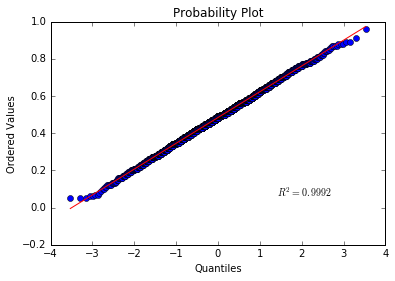

In [78]:
probplot(data['mes_estim'], dist="norm", plot=pylab)

In [91]:
pt = data.loc[data.treatment == 1, :].pivot_table(index="state", 
     values="area_code", columns="churn", aggfunc = len, fill_value=0)
pt

churn,False.,True.
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5
CO,17,5
CT,25,5
DC,18,1
DE,16,1


In [94]:
sum(chi2_contingency(pt.values)[3])

1097.0

In [95]:
np.sqrt(44.052712366925483/(1097.0))

0.20039321502033319